In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

**LINEAR REGRESSION**

1) Load the “data/curve80.txt” data set, and split it into 75% / 25% training/test. The first column
data[:,0] is the scalar feature (x) values; the second column data[:,1] is the target value y
for each example. For consistency in our results, don’t reorder (shuffle) the data (they’re already in a
random order), and use the first 75% of the data for training and the rest for testing:

In [2]:
data = np.genfromtxt("curve80.txt", delimiter = None)
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

Print the shape of these 4 objects:

In [3]:
print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)

(60, 1)
(20, 1)
(60,)
(20,)


2) Use the provided linearRegress class to create a linear regression predictor of y given x. You
can plot the resulting function by simply evaluating the model at a large number of x values, xs:

(a) Plot the training data points along with your prediction function in a single plot. (10 points)


(200, 1)
(200, 1)


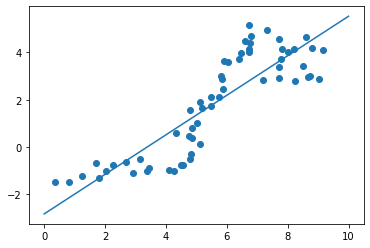

In [4]:
lr = ml.linear.linearRegress(Xtr, Ytr) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)
ys = lr.predict(xs) # make predictions at xs
print(ys.shape)
print(xs.shape)
plt.scatter(Xtr, Ytr)
plt.plot(xs, lr.predict(xs))


(b) Print the linear regression coefficients (lr.theta) and verify that they match your plot. (5
points)

In [5]:
print(lr.theta)

[[-2.82765049  0.83606916]]


(c) What is the mean squared error of the predictions on the training and test data? (10 points)


In [9]:
print(lr.mse(Xte, Yte))
print(lr.mse(Xtr, Ytr))

2.2423492030101246
1.127711955609391


Try fitting y = f(x) using a polynomial function f(x) of increasing order. Do this by the trick of
adding additional polynomial features before constructing and training the linear regression object.
You can do this easily yourself; you can add a quadratic feature of Xtr with

In [3]:
Xtr2 = np.zeros( (Xtr.shape[0],2) ) # create Mx2 array to store features
Xtr2[:,0] = Xtr[:,0] # place original "x" feature as X1
Xtr2[:,1] = Xtr[:,0]**2 # place "xˆ2" feature as X2
#print(Xtr2)
#Now, Xtr2 has two features about each data point: "x" and "xˆ2"

Train models of degree d = 1, 3, 5, 7, 10, 18 and:
(a) plot their learned prediction functions f(x) (15 points)

(60, 3) (60, 1)


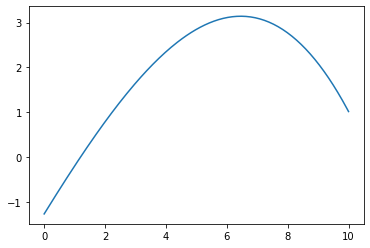

In [10]:
degrees = [3]
# Create polynomial features up to "degree"; don’t create constant feature
# (the linear regression learner will add the constant feature automatically)
train_error = []
test_error = []

for d in degrees:
    XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
    #print(XtrP)
    #print(Xtr)
    XtrP,params = ml.transforms.rescale(XtrP)
    print(XtrP.shape, Xtr.shape)
    #Xtr,params = ml.transforms.rescale(Xtr)
    #XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,d,False), params)
    lr = ml.linear.linearRegress(XtrP, Ytr) 
    xs = np.linspace(0,10,200) 
    xs = xs[:,np.newaxis] 
    xs_p = ml.transforms.fpoly(xs, d, bias=False)
    xs_p,params = ml.transforms.rescale(xs_p)
    test_error.append(lr.mse(XteP, Yte))
    train_error.append(lr.mse(XtrP, Ytr))
    plt.figure()
    plt.plot(xs, lr.predict(xs_p))


(b) plot their training and test errors on a log scale (semilogy) as a function of the degree. (10
points)

Text(0, 0.5, 'MSE')

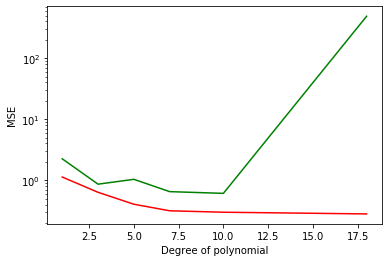

In [12]:
plt.semilogy(degrees, train_error, color = 'red')
plt.semilogy(degrees, test_error, color = 'green')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")

(c) What polynomial degree do you recommend? 

Based on this, I would recommend a polynomial of degree 10. 

**CROSS-VALIDATION**

Using this technique on your training data Xtr from the previous problem, find the 5-fold crossvalidation MSE of linear regression at the same degrees as before, d = 1, 3, 5, 7, 10, 18 (or more densely, if
you prefer). Again, a function that has degree and number of folds as arguments, and returns cross-validation
error, will be useful.

1. Plot the five-fold cross-validation error and test error (with semilogy, as before) as a function of
degree. (10 points)

Text(0, 0.5, 'MSE')

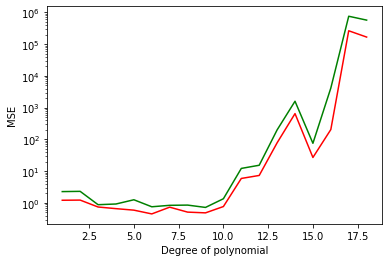

In [13]:
def cv_model(nFolds, degrees):
    cv_error = []
    test_e = []
    for d in degrees:
        XtrP = ml.transforms.fpoly(Xtr, d, bias=False)
        XtrP,params = ml.transforms.rescale(XtrP)
        XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,d,False), params)
        c_e = []
        t_e = []
        for iFold in range(nFolds):
            Xti,Xvi,Yti,Yvi = ml.crossValidate(XtrP,Ytr,nFolds,iFold) # use ith block as validation
            learner = ml.linear.linearRegress(Xti, Yti) 
            c_e.append(learner.mse(Xvi, Yvi))
            t_e.append(learner.mse(XteP, Yte))
        cv_error.append(np.mean(c_e))
        test_e.append(np.mean(t_e))
    return cv_error, test_e

cv_e, t_e = cv_model(5, range(1,19))
plt.semilogy(range(1,19), cv_e, color = 'red')
plt.semilogy(range(1,19), t_e, color = 'green')
plt.xlabel("Degree of polynomial")
plt.ylabel("MSE")


2) How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the
actual test data (Problem 1)?

The estimates are very similar, and the reason is because the CV error is an unbiased estimator of the test error. On the graph where we DIDN'T use cross-validation, the train set and test set error are pretty drastically different. 

3) Which polynomial degree do you recommend based on five-fold cross-validation error? (5 points)

I would recommend using degree 6, which is where the min error on the 5-fold CV error occurs. 
We should be doing parameter selection based on the performance of the validation set, not the test set.
The test set is used to evaluate performance of a particular model, but not to evaluate hyperparameters like what degree polynomial we should use. 

4) For the degree that you picked in step 3, plot the cross-validation error as the number of folds is varied
(nFolds = 2, 3, 4, 5, 6, 10, 12, 15), again with semilogy. What pattern do you observe, and how do
you explain it? (15 points)

What's happening is that the cross validation error is decreasing as we increase the number of folds. I assume we'd have minimum error if we leave out only one data point while doing cross fold validation,  but the issue with that is it would be very slow. It makes sense that error decreases with more folds because there's a tradeoff between bias and variance. 


Text(0, 0.5, 'Cross validation error')

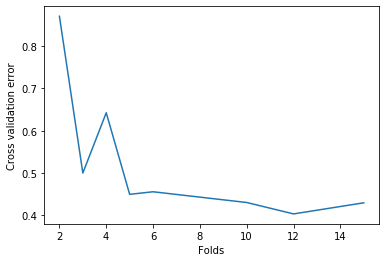

In [14]:
folds = [2, 3, 4, 5, 6, 10, 12, 15]
degree = [6]
cross_val_error = [] 
for f in folds:
    cross_val_error.append(cv_model(f, degree)[0])
plt.plot(folds, cross_val_error)
plt.xlabel("Folds")
plt.ylabel("Cross validation error")

 **COLLABORATION STATEMENT**
 
 I worked alone for the HW. 